# Arc Plots

Some arc plot code exists already, such as:
* https://python-graph-gallery.com/565-arc-diagram-with-arcplot/
* https://github.com/szkics/arcplot 

Here we will make our own arc plots using pyplot:


In [1]:
import matplotlib.pyplot as plt

### Example:  Texas Migrant Bussing

From March 2021 to January 2024, Texas bussed over 100,000 migrants out-of-state. Collectively, Texas sent:
* Over 12,500 migrants to Washington, D.C. since April 2022
* Over 37,100 migrants to New York City since August 2022
* Over 30,800 migrants to Chicago since August 2022
* Over 3,400 migrants to Philadelphia since November 2022
* Over 15,700 migrants to Denver since May 2023
* Over 1,500 migrants to Los Angeles since June 2023

Source:  https://gov.texas.gov/news/post/texas-transports-over-100000-migrants-to-sanctuary-cities 

We can easily show these numbers using a bar chart:

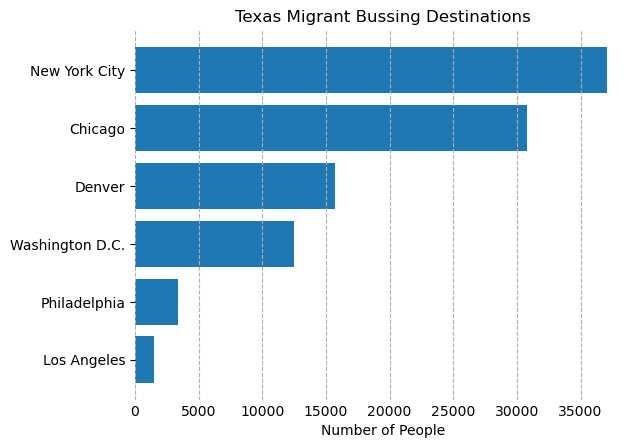

In [24]:
bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

fix, ax = plt.subplots()
tuples = [(bussing_data[i], i) for i in bussing_data]
tuples.sort() 

ax.barh([t[1] for t in tuples], [t[0] for t in tuples])
ax.set_title("Texas Migrant Bussing Destinations")
ax.set_xlabel("Number of People")
ax.grid(axis="x", linestyle="--")
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis="x", length = 0)

plt.show()


Now suppose we want to use an **arc chart**. Some things we'd like to see in this chart include
* An arc connecting Texas to each destination city
* Width of the arc corresponding to number of people bussed out of state
* Rectangles to anchor each city (similar to a Sankey diagram)

We will start with the rectangles, and for now will order the locations geographically from West to East:

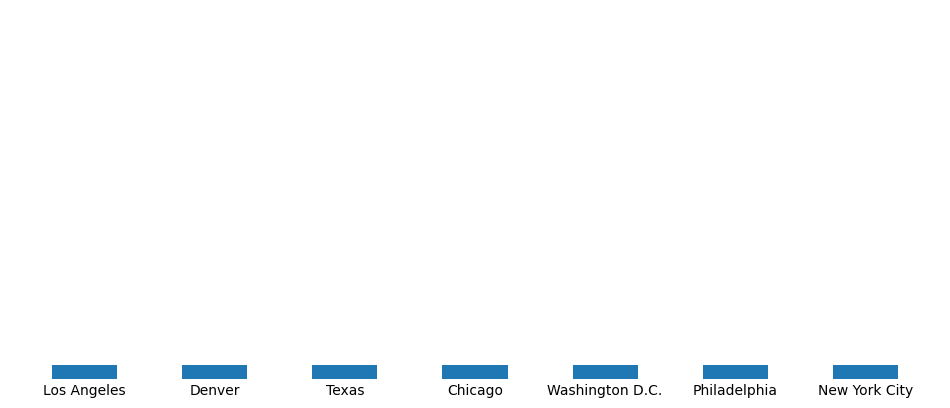

In [28]:
# Plot rectangles for each city. 

bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

fig, ax = plt.subplots(figsize=(12, 4.8))

# Lazy rectangles
ax.bar(["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"], [-2] * 7, width = 0.5)

ax.set_ylim(-2, 50)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)


plt.show() 

Now we'll make the rectangles proportional to the number of people sent:
* Width of Texas = 1, representing the total

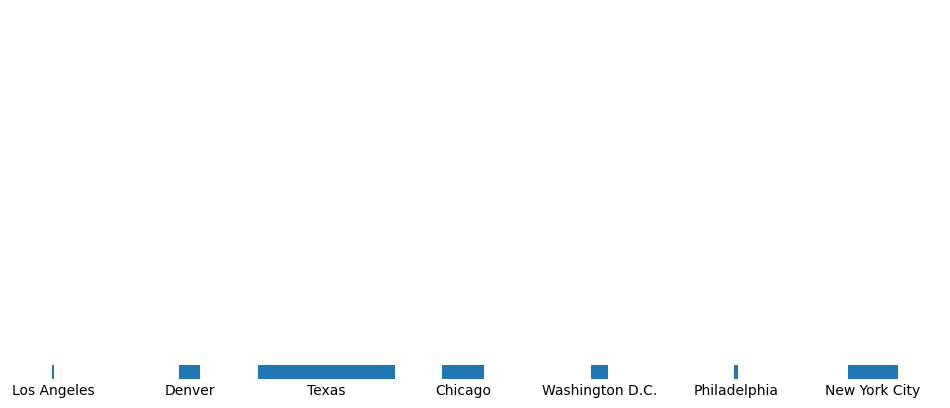

In [29]:
# Plot rectangles for each city. 

bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

total = sum(bussing_data.values())
bussing_data["Texas"] = total

fig, ax = plt.subplots(figsize=(12, 4.8))

city_order = ["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"]

# Lazy rectangles
ax.bar(city_order, [-2] * 7, width = [bussing_data[c] / total for c in city_order])

ax.set_ylim(-2, 50)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)

plt.show() 

Now we can draw arcs between cities:

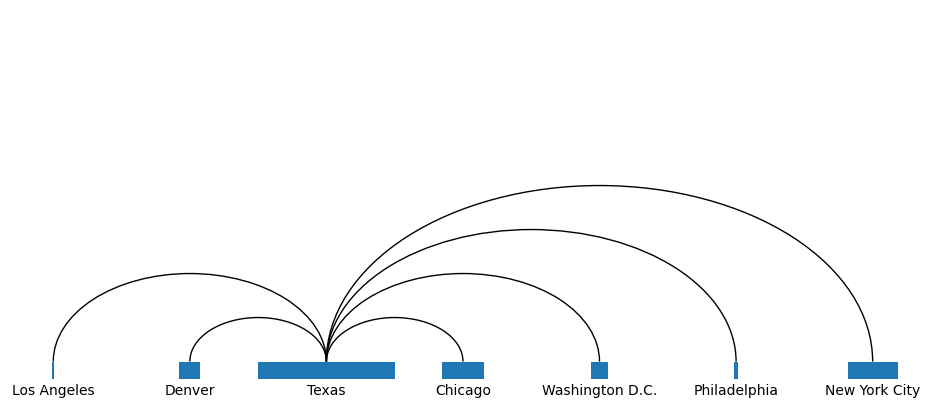

In [47]:
# Plot rectangles for each city. 

import matplotlib.patches as mpatches

def draw_arc(left, right, ax):
    midpoint = (left + right) / 2
    radius = right - midpoint
    
    new_arc = mpatches.Arc(xy = (midpoint, 0),  width = 2 * radius, height = 5 * radius, theta1 = 0, theta2 = 180)
    ax.add_patch(new_arc)   
    
bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

total = sum(bussing_data.values())
bussing_data["Texas"] = total

fig, ax = plt.subplots(figsize=(12, 4.8))

city_order = ["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"]
widths = [bussing_data[c] / total for c in city_order]

# Lazy rectangles
ax.bar(city_order, [-2] * 7, width = widths)

ax.set_ylim(-0.5, 10)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)

# Test Run

draw_arc(0, 2, ax) # Los Angeles
draw_arc(1, 2, ax) # Denver
draw_arc(2, 3, ax) # Chicago
draw_arc(2, 4, ax) # D.C.
draw_arc(2, 5, ax) # Philly
draw_arc(2, 6, ax) # NYC


plt.show() 

To show the data, we'd like to: 
* Calculate left and right boundaries of arcs (make proprotional to number of people bussed out of state)
* Fill color between arcs
* Make arc colors transparent

We'll start with the boundaries:

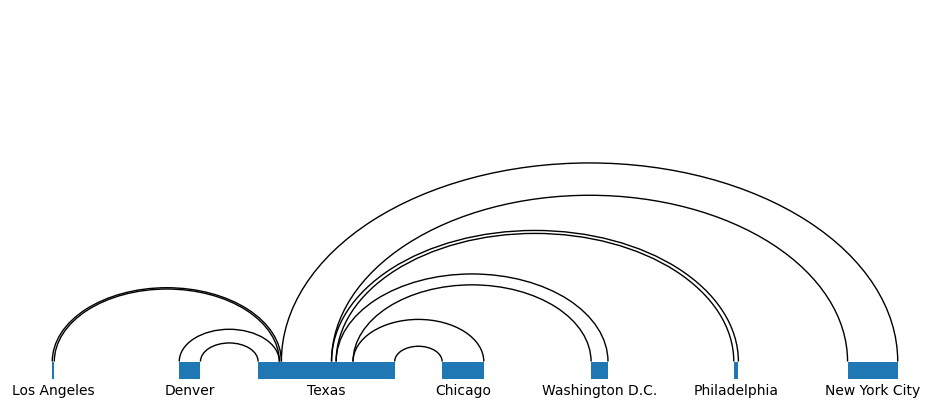

In [51]:
# Plot rectangles for each city. 

import matplotlib.patches as mpatches
import numpy as np

def draw_arc(left, right, ax):
    midpoint = (left + right) / 2
    radius = np.abs(right - midpoint)
    
    new_arc = mpatches.Arc(xy = (midpoint, 0),  width = 2 * radius, height = 5 * radius, theta1 = 0, theta2 = 180)
    ax.add_patch(new_arc)   
    
bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

total = sum(bussing_data.values())
bussing_data["Texas"] = total

fig, ax = plt.subplots(figsize=(12, 4.8))

city_order = ["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"]
widths = [bussing_data[c] / total for c in city_order]

# Lazy rectangles
ax.bar(city_order, [-2] * 7, width = widths)

ax.set_ylim(-0.5, 10)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)

# Calculate arc boundaries
# Work from "inside" to "outside"
# Arcs from Texas (left to right) should be Denver, LA, NYC, Philly, DC, Chicago

lefts = []
rights = []
arc_order = ["Denver", "Los Angeles", "New York City", "Philadelphia", "Washington D.C.", "Chicago"]

cur_right = 2 - 0.5 
for c in arc_order:
    i = city_order.index(c)
 
    lefts += [i - widths[i] / 2, i + widths[i] / 2]
    rights += [cur_right + widths[i], cur_right]
    cur_right += widths[i]  

for i in range(len(lefts)):
    draw_arc(lefts[i], rights[i], ax) 

plt.show() 

Now we're ready to add in the shading:
* Will make the arc boundaries thinner too

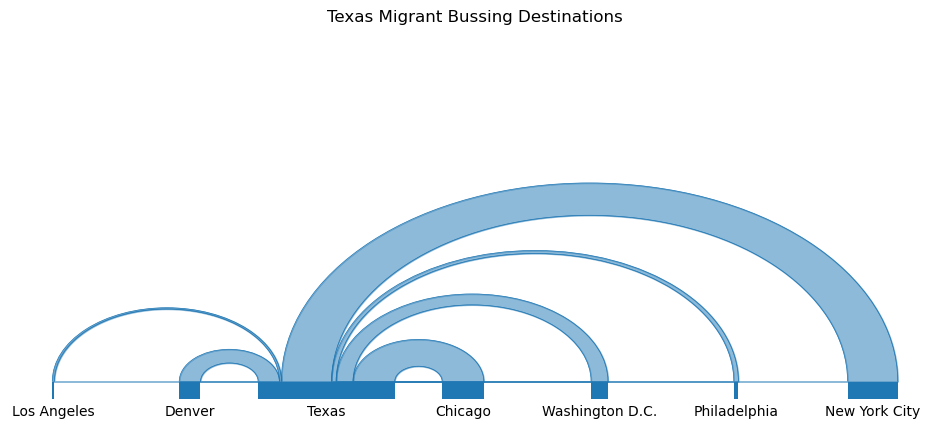

In [63]:
# Plot rectangles for each city. 

import matplotlib.patches as mpatches
import numpy as np

def draw_arc(left, right, ax):
    midpoint = (left + right) / 2
    radius = np.abs(right - midpoint)
    
    new_arc = mpatches.Arc(xy = (midpoint, 0),  width = 2 * radius, height = 5 * radius, theta1 = 0, theta2 = 180, color="tab:blue", lw=0.5)
    ax.add_patch(new_arc) 
    
def shade_arc(pair1, pair2, ax):
    # Find points on ellipse using parametric coordinates
    midpoint1 = (pair1[0] + pair1[1]) / 2
    radius1 = np.abs(pair1[0] - midpoint1)    
    
    theta1 = np.radians(np.linspace(0, 180, 100))
    x1 = midpoint1 + radius1 * np.cos(theta1)
    y1 = 2.5 * radius1 * np.sin(theta1)
    
    midpoint2 = (pair2[0] + pair2[1]) / 2
    radius2 = np.abs(pair2[0] - midpoint2)    
    
    theta2 = np.radians(np.linspace(0, 180, 100))
    x2 = midpoint2 + radius2 * np.cos(theta2)
    y2 = 2.5 * radius2 * np.sin(theta2)

    # Fill the area between the arcs
    ax.fill_between(np.concatenate([x1, x2[::-1]]), np.concatenate([y1, y2[::-1]]), color='tab:blue', alpha=0.5)
     
bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

total = sum(bussing_data.values())
bussing_data["Texas"] = total

fig, ax = plt.subplots(figsize=(12, 4.8))

city_order = ["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"]
widths = [bussing_data[c] / total for c in city_order]

# Lazy rectangles
ax.bar(city_order, [-2] * 7, width = widths)

ax.set_ylim(-0.5, 10)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)

# Calculate arc boundaries
# Work from "inside" to "outside"
# Arcs from Texas (left to right) should be Denver, LA, NYC, Philly, DC, Chicago

lefts = []
rights = []
arc_order = ["Denver", "Los Angeles", "New York City", "Philadelphia", "Washington D.C.", "Chicago"]

cur_right = 2 - 0.5 
for c in arc_order:
    i = city_order.index(c)
 
    lefts += [i - widths[i] / 2, i + widths[i] / 2]
    rights += [cur_right + widths[i], cur_right]
    cur_right += widths[i]  

for i in range(len(lefts)):
    draw_arc(lefts[i], rights[i], ax) 
    
for i in range(0, len(lefts), 2):
    shade_arc((lefts[i], rights[i]), (lefts[i+1], rights[i+1]), ax)

ax.set_title("Texas Migrant Bussing Destinations")
    
plt.show() 

Finally, we'll squash the chart a bit to make the arcs more vertical:

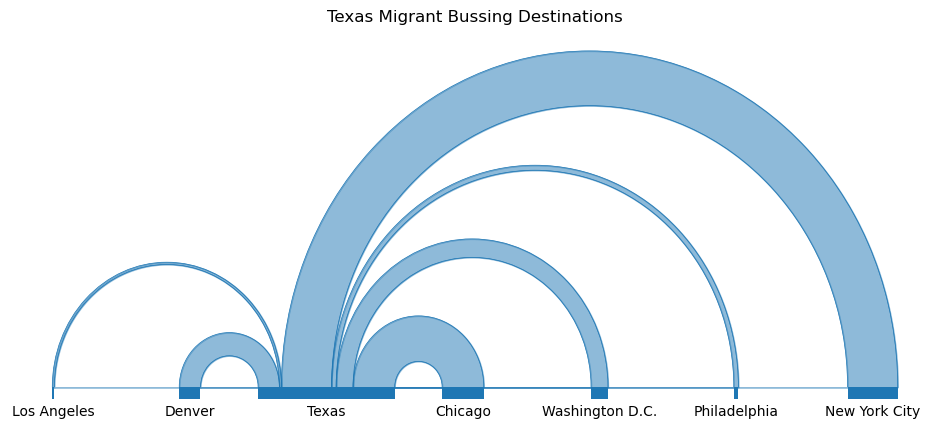

In [65]:
# Plot rectangles for each city. 

import matplotlib.patches as mpatches
import numpy as np

def draw_arc(left, right, ax):
    midpoint = (left + right) / 2
    radius = np.abs(right - midpoint)
    
    new_arc = mpatches.Arc(xy = (midpoint, 0),  width = 2 * radius, height = 5 * radius, theta1 = 0, theta2 = 180, color="tab:blue", lw=0.5)
    ax.add_patch(new_arc) 
    
def shade_arc(pair1, pair2, ax):
    # Find points on ellipse using parametric coordinates
    midpoint1 = (pair1[0] + pair1[1]) / 2
    radius1 = np.abs(pair1[0] - midpoint1)    
    
    theta1 = np.radians(np.linspace(0, 180, 100))
    x1 = midpoint1 + radius1 * np.cos(theta1)
    y1 = 2.5 * radius1 * np.sin(theta1)
    
    midpoint2 = (pair2[0] + pair2[1]) / 2
    radius2 = np.abs(pair2[0] - midpoint2)    
    
    theta2 = np.radians(np.linspace(0, 180, 100))
    x2 = midpoint2 + radius2 * np.cos(theta2)
    y2 = 2.5 * radius2 * np.sin(theta2)

    # Fill the area between the arcs
    ax.fill_between(np.concatenate([x1, x2[::-1]]), np.concatenate([y1, y2[::-1]]), color='tab:blue', alpha=0.5)
     
bussing_data = {"Washington D.C." : 12500,
                "New York City": 37100,
                "Chicago": 30800,
                "Philadelphia": 3400,
                "Denver": 15700, 
                "Los Angeles": 1500}

total = sum(bussing_data.values())
bussing_data["Texas"] = total

fig, ax = plt.subplots(figsize=(12, 4.8))

city_order = ["Los Angeles", "Denver", "Texas", "Chicago", "Washington D.C.", "Philadelphia", "New York City"]
widths = [bussing_data[c] / total for c in city_order]

# Lazy rectangles
ax.bar(city_order, [-2] * 7, width = widths)

ax.set_ylim(-0.2, 6)

ax.set_yticklabels([])
ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(axis = "both", length = 0)

# Calculate arc boundaries
# Work from "inside" to "outside"
# Arcs from Texas (left to right) should be Denver, LA, NYC, Philly, DC, Chicago

lefts = []
rights = []
arc_order = ["Denver", "Los Angeles", "New York City", "Philadelphia", "Washington D.C.", "Chicago"]

cur_right = 2 - 0.5 
for c in arc_order:
    i = city_order.index(c)
 
    lefts += [i - widths[i] / 2, i + widths[i] / 2]
    rights += [cur_right + widths[i], cur_right]
    cur_right += widths[i]  

for i in range(len(lefts)):
    draw_arc(lefts[i], rights[i], ax) 
    
for i in range(0, len(lefts), 2):
    shade_arc((lefts[i], rights[i]), (lefts[i+1], rights[i+1]), ax)

ax.set_title("Texas Migrant Bussing Destinations")
    
plt.show() 